## House Price Prediction

### Import Tools

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import matplotlib.pyplot as plt
import math 

### Load Data

In [5]:
data = pd.read_csv("./kc_house_data.csv")

In [6]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
X = data[['bedrooms','bathrooms','sqft_living','floors']]
y = data['price']

### Split Data into Train and Test

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=1/3, random_state=0)

In [10]:
xtrain = np.asmatrix(xtrain)
xtest = np.asmatrix(xtest)
ytrain = np.ravel(ytrain)
ytest = np.ravel(ytest)

### Price by Living Area 

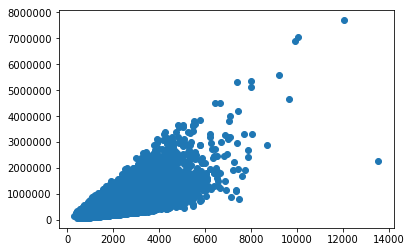

In [12]:
plt.scatter(X['sqft_living'], y)
plt.show()

### Living Area Distribution

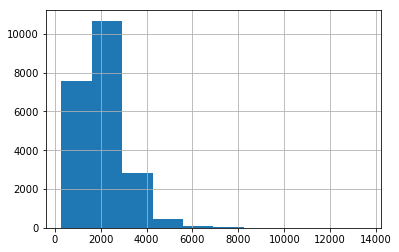

In [13]:
X['sqft_living'].hist()
plt.show()

### Train

In [14]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,bedrooms,-51118.881973
1,bathrooms,4146.343826
2,sqft_living,300.225555
3,floors,5226.700983


In [16]:
model.intercept_

71317.928922335617

### Validate

Three bedrooms, two bathrooms, 2500 sqft, 2 floors

In [18]:
model.predict([[3,2,2500,2]])

array([ 687271.26074668])

### Mean Squared Error on Training Data 

In [19]:
pred = model.predict(xtrain)
((pred-ytrain)*(pred-ytrain)).sum() / len(ytrain)

64954234066.379501

### Mean Relative Error on Training Data

In [22]:
(abs(pred-ytrain)/ytrain).sum() / len(ytrain)

0.35054825833706521

### Mean Squared Error on Testing Data

In [20]:
predtest = model.predict(xtest)
((predtest-ytest)*(predtest-ytest)).sum() / len(ytest)

69651448893.860321

### Mean Relative Error on Training Data

In [21]:
(abs(predtest-ytest)/ytest).sum() / len(ytest)

0.34624369015230427